# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

# Importing the dataset

In [ ]:
df = pd.read_excel("Online Retail.xlsx")

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Cleaning up the data

In [ ]:
df.dropna(subset = ["CustomerID"], inplace = True)
df = df[df["Quantity"] > 0]
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

<ipython-input-5-2de2a2224edb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
<ipython-input-5-2de2a2224edb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
 8   TotalPrice   397924 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.4+ MB


# Setting Reference Date and Create RFM Table

In [ ]:
ref_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

In [ ]:
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (ref_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).reset_index()

In [ ]:
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

In [ ]:
rfm

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40
...,...,...,...,...
4334,18280.0,278,1,180.60
4335,18281.0,181,1,80.82
4336,18282.0,8,2,178.05
4337,18283.0,4,16,2094.88


In [ ]:
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])

rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

In [ ]:
rfm

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,12346.0,326,1,77183.60,1,1,4,114
1,12347.0,2,7,4310.00,4,4,4,444
2,12348.0,75,4,1797.24,2,3,4,234
3,12349.0,19,1,1757.55,3,1,4,314
4,12350.0,310,1,334.40,1,1,2,112
...,...,...,...,...,...,...,...,...
4334,18280.0,278,1,180.60,1,2,1,121
4335,18281.0,181,1,80.82,1,2,1,121
4336,18282.0,8,2,178.05,4,3,1,431
4337,18283.0,4,16,2094.88,4,4,4,444


In [ ]:
def assign_segment(score):
    if score == '444':
        return 'Champions'
    elif score[0] == '4':
        return 'Recent Customers'
    elif score[1] == '4':
        return 'Frequent Buyers'
    elif score[2] == '4':
        return 'Big Spenders'
    elif score in ['111', '112', '211']:
        return 'At Risk'
    else:
        return 'Others'

rfm['Segment'] = rfm['RFM_Score'].apply(assign_segment)

In [ ]:
rfm

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
0,12346.0,326,1,77183.60,1,1,4,114,Big Spenders
1,12347.0,2,7,4310.00,4,4,4,444,Champions
2,12348.0,75,4,1797.24,2,3,4,234,Big Spenders
3,12349.0,19,1,1757.55,3,1,4,314,Big Spenders
4,12350.0,310,1,334.40,1,1,2,112,At Risk
...,...,...,...,...,...,...,...,...,...
4334,18280.0,278,1,180.60,1,2,1,121,Others
4335,18281.0,181,1,80.82,1,2,1,121,Others
4336,18282.0,8,2,178.05,4,3,1,431,Recent Customers
4337,18283.0,4,16,2094.88,4,4,4,444,Champions


# Visualize Segment Counts

<ipython-input-17-e5a9a42cfee2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm, x='Segment', order=rfm['Segment'].value_counts().index, palette='Set2')


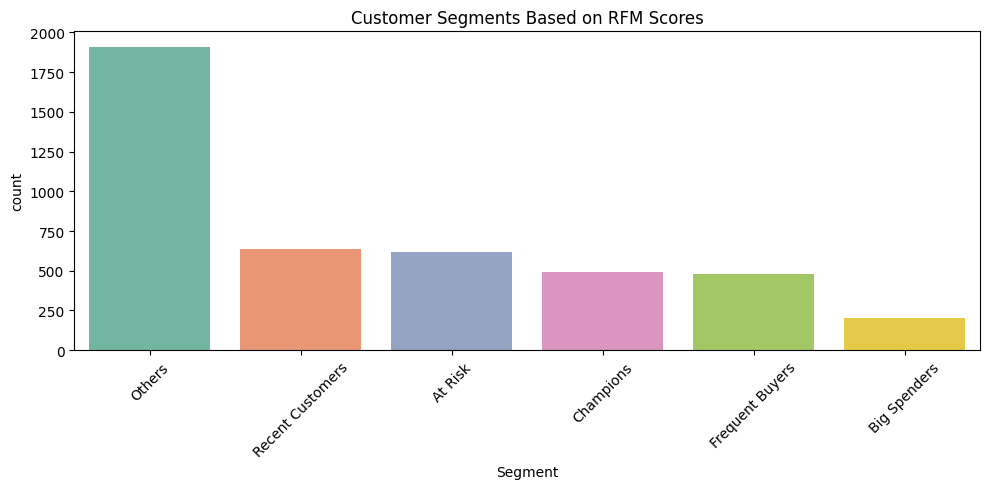

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=rfm, x='Segment', order=rfm['Segment'].value_counts().index, palette='Set2')
plt.title("Customer Segments Based on RFM Scores")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-18-0dbea79003f2>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = rfm.groupby(['R_Score', 'F_Score'])['Monetary'].mean().unstack()


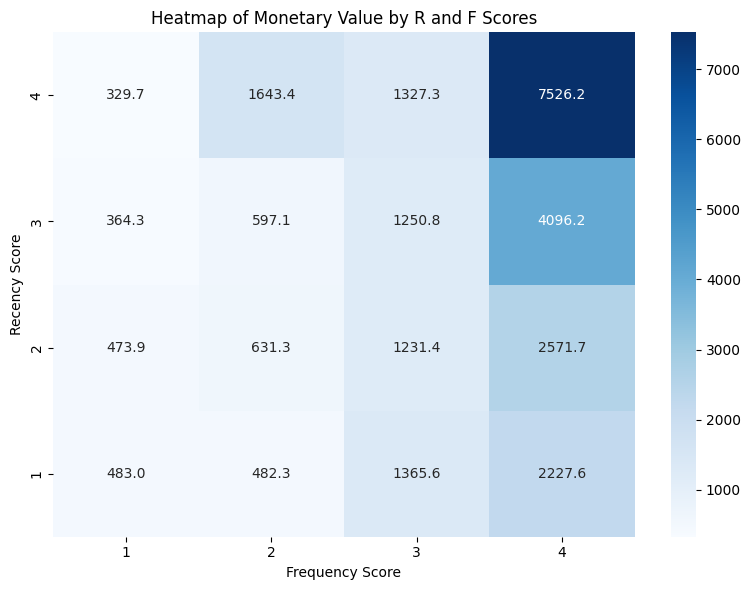

In [ ]:
heatmap_data = rfm.groupby(['R_Score', 'F_Score'])['Monetary'].mean().unstack()

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="Blues")
plt.title("Heatmap of Monetary Value by R and F Scores")
plt.ylabel("Recency Score")
plt.xlabel("Frequency Score")
plt.tight_layout()
plt.show()

In [ ]:
rfm.to_csv("rfm_segments.csv", index=False)

# Clustering

## Importing the dataset

In [3]:
dataset = pd.read_excel("Online Retail.xlsx")
dataset.dropna(inplace = True)
dataset = dataset[dataset["Quantity"] > 0]

In [4]:
dataset = dataset.iloc[:, [3, 5]].values

## Scaling the Features

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(dataset)

array([[-0.03891932, -0.02562251],
       [-0.03891932,  0.01239211],
       [-0.02783407, -0.01657141],
       ...,
       [-0.05000457,  0.04678629],
       [-0.05000457,  0.04678629],
       [-0.05554719,  0.0829907 ]])

## Finding optimal number of clusters using the elbow method

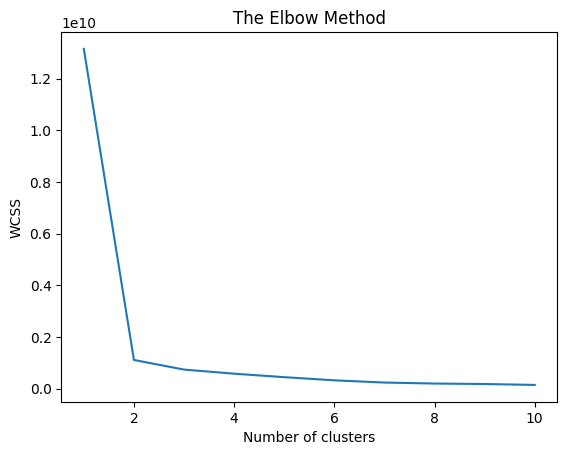

In [12]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = "k-means++")
  kmeans.fit(dataset)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

## Training the final model selecting n_clusters = 2

In [13]:
kmeans = KMeans(n_clusters = 2, init = "k-means++")

In [14]:
y_kmeans = kmeans.fit_predict(dataset)

## Plotting the data

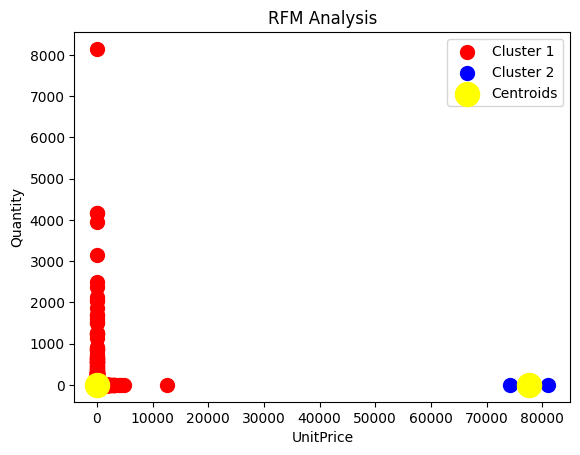

In [15]:
plt.scatter(dataset[y_kmeans == 0, 0], dataset[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(dataset[y_kmeans == 1, 0], dataset[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('RFM Analysis')
plt.xlabel('UnitPrice')
plt.ylabel('Quantity')
plt.legend()
plt.show()